# PROJECT NAME : CHURN PREDICTION (TELECOM CUSTOMER DATASET)

#### Aim:

The Main Aim of the Project is to Predict whether the Customer is Going to Stop his services or Not.(Churn Prediction)

#### Life Cycle of this Project:

* Importing the Data 
  0.1 This may Include varities of sources like 
      0.1.1 Companies Official Database API's 
      0.1.2 Cloud Service Database Like (Azure, AWS, GCP)
      0.1.3 Stream Analytics Pipeline Includes Messaging Systems(Apache Kafka), Streaming Platforms(Apache Spark), Databases, Apps etc.

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Selection
5. Model Building with Hyperparametre Tuning
6. Model Deployment (Pickle File for Developing into an Web App)
7. Running an Test Cases for Newly Coming Data

In [1]:
import pandas as pd                                   ### For reading the Tabular Data 
import numpy as np                                    ### For Numerical Analytics
pd.pandas.set_option('display.max_columns', None)     ### Displaying all the columns

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading the data
import sqlalchemy
import yaml

### reading the database credential in safe Mode
db = yaml.full_load(open("ML-WorkFlow/database.yaml"))   
username = db['mysql_user']
password = db['mysql_password']
host = db['mysql_host']
dbname = db['mysql_db']

### Connecting to the database
engine = sqlalchemy.create_engine("mysql+pymysql://"+username+":"+password+"@"+host+"/"+dbname)

data = pd.read_sql_table("customerdata", engine)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### Number of rows and Columns
data.shape

(7043, 21)

In [4]:
### collect some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe().T      ### Distribution of data

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
### Saving the distribution format in json format for avoiding anomalies while the app in use
import os 

overview = data.describe()
schema_in = overview.loc[["min","max"]]
schema_in.to_json("schema_in.json")

### 1.0 Data Analysis :

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
8. Correlation
7. Relationship between independent and dependent feature(Churn)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
### Features with Nan Values
Nan_columns = [feature for feature in data.columns if data[feature].isnull().sum() > 1]
Nan_columns 

[]

No Nan Values in the data

In [9]:
### Lets Pickup the Numerical Variables
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_feature

['SeniorCitizen', 'tenure', 'MonthlyCharges']

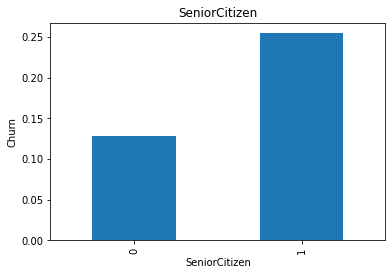

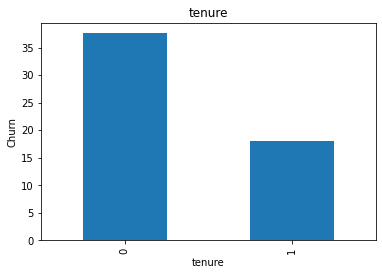

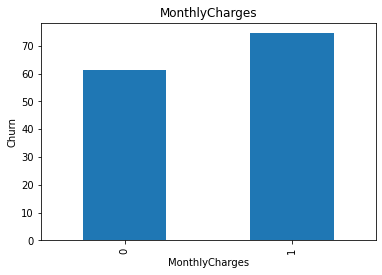

In [10]:
### Distribution of Numerical Data With Respect to the Output(Dependent FEature)
for feature in numerical_feature:
    df = data.copy()
    df['Churn'] = np.where(df['Churn']=="Yes",1,0 )     # Going to replace Yes in Churn Column with 1 and No with 0
    
    df.groupby("Churn")[feature].mean().plot.bar()     # Grouping the Churn COlumn and Comparing with NUmerical Features               
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.title(feature)
    plt.show()

In [11]:
### Categorical Features 
categoircal_features = [feature for feature in data.columns if feature not in numerical_feature + ['customerID'] + ['Churn']]
categoircal_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

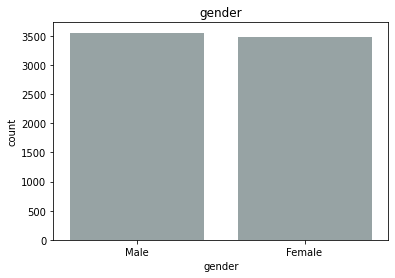

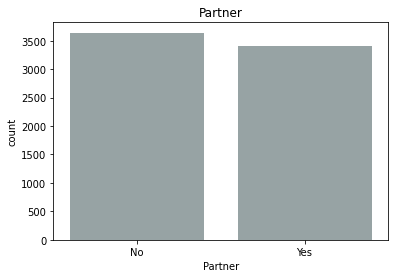

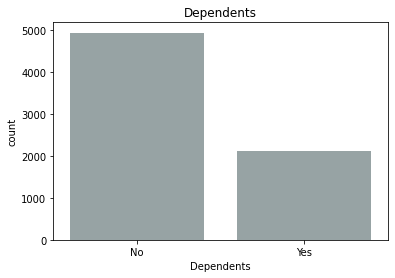

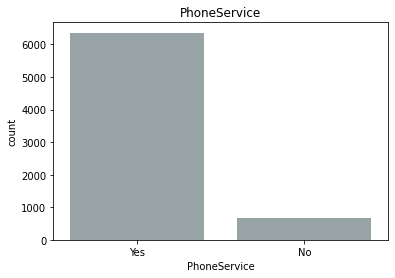

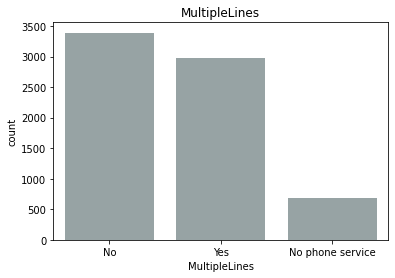

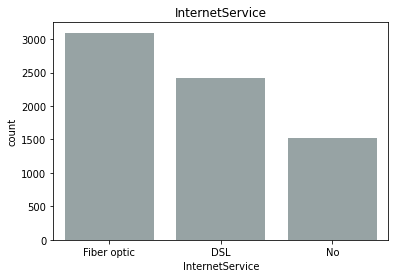

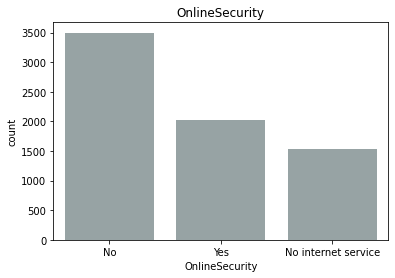

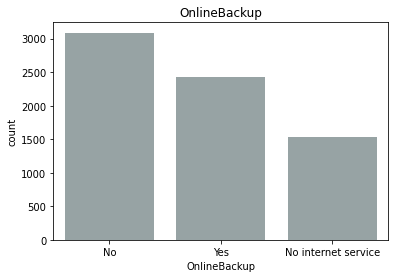

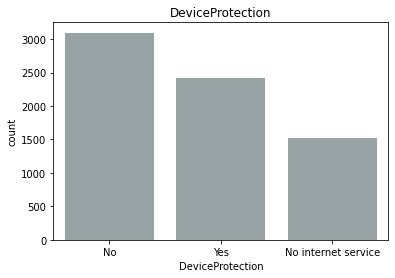

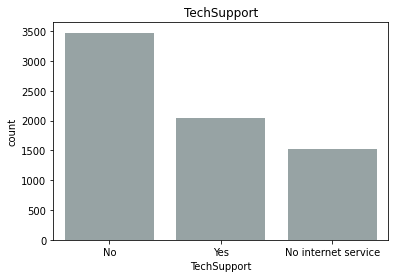

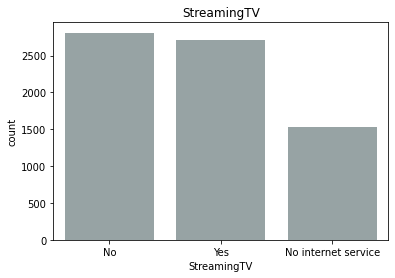

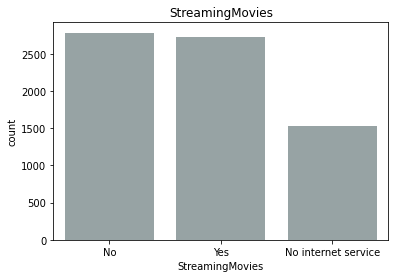

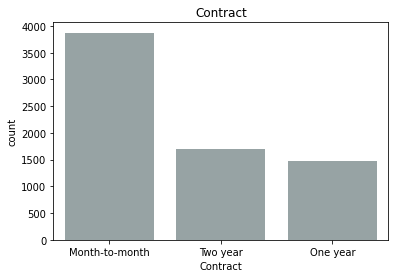

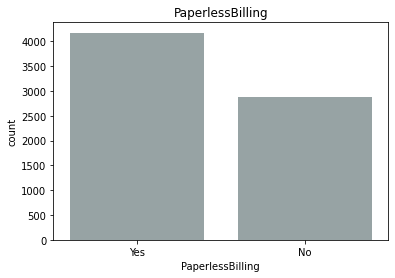

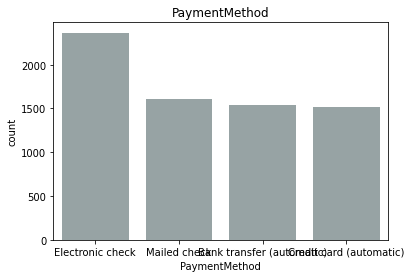

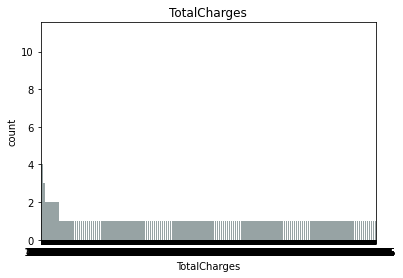

In [12]:
### Distribution of Categorical Features
for feature in categoircal_features:
    sns.countplot(data[feature], color="#95a5a6", order=data[feature].value_counts().index)
    plt.title(feature)
    plt.show()

Here From the above graphs there is no chance for cardinal Features too

In [13]:
### Number of Unique Features in Categorical Data

for feature in categoircal_features:
    print("{} has {} Number of Unique Values".format(feature, data[feature].nunique()))

gender has 2 Number of Unique Values
Partner has 2 Number of Unique Values
Dependents has 2 Number of Unique Values
PhoneService has 2 Number of Unique Values
MultipleLines has 3 Number of Unique Values
InternetService has 3 Number of Unique Values
OnlineSecurity has 3 Number of Unique Values
OnlineBackup has 3 Number of Unique Values
DeviceProtection has 3 Number of Unique Values
TechSupport has 3 Number of Unique Values
StreamingTV has 3 Number of Unique Values
StreamingMovies has 3 Number of Unique Values
Contract has 3 Number of Unique Values
PaperlessBilling has 2 Number of Unique Values
PaymentMethod has 4 Number of Unique Values
TotalCharges has 6531 Number of Unique Values


Here we can see the total charges we need to change it into an Integer

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

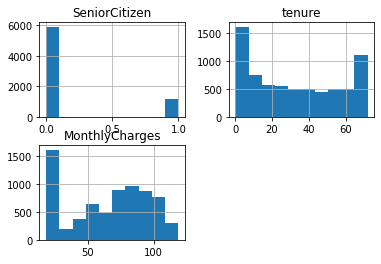

In [14]:
### Distribution of Data
data.hist()

Data is Skewed

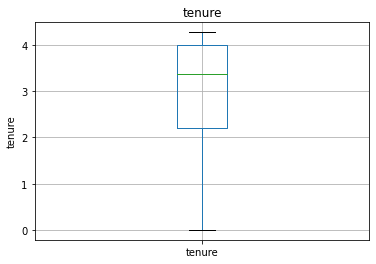

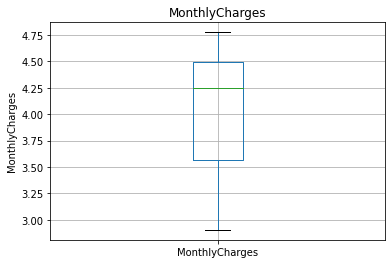

In [15]:
### Finding the Outliers
numerical_feature.remove("SeniorCitizen")
for feature in numerical_feature:
    df[feature] = np.log(df[feature])    ### Since the data is skewed
    df.boxplot(column=feature)
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

<AxesSubplot:>

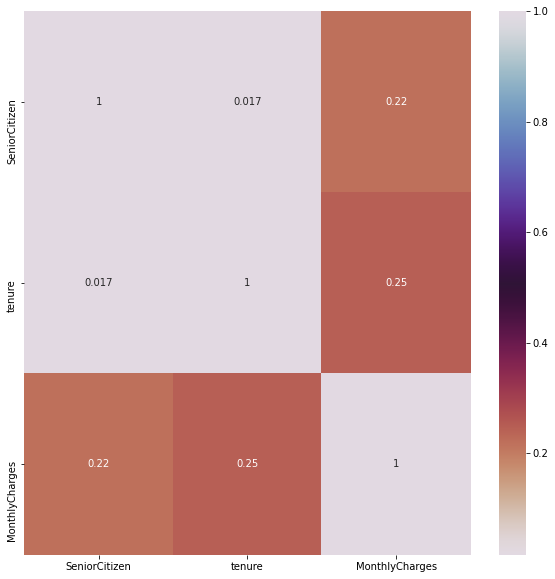

In [16]:
### Correlation Matrix

correlation = data.corr()                                                         # Forming Correlation Table
correlation_matrix = correlation.index                                            # Picking up the Columns
                                                                               
plt.figure(figsize=(10,10))                                                       # Figure Size
sns.heatmap(data[correlation_matrix].corr(), cmap = 'twilight_r', annot = True)   # sns Heatmap for Correlation

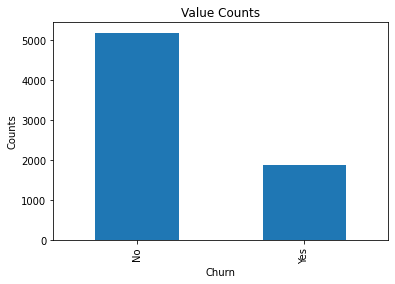

In [17]:
### Dependent Feature Checking for Oversample or Downsample                       
counts = pd.value_counts(data["Churn"], sort=True)                   # Counting NUmber of Yes and No's
counts.plot(kind="bar")
plt.xlabel("Churn")
plt.ylabel("Counts")
plt.title("Value Counts")
plt.show()

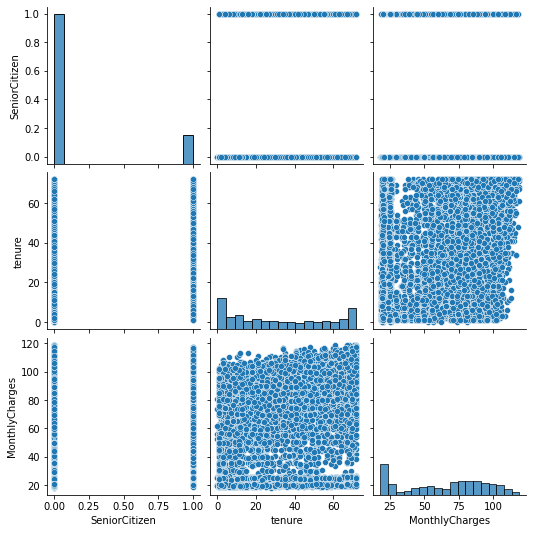

In [18]:
### Pairplot for distirbution of Data
sns.pairplot(data)

### 2.0 Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values (In Our Case No Missing Values)
2. Temporal variables (No Temporal Values Too)
3. Categorical variables: remove rare labels 
4. Encoding Categorical Variables
4. Standarise the values of the variables to the same range

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
### Converting the total charge from dtype object to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], downcast='integer', errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

In [21]:
### Since the Data is Skewed
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!="O"]
numerical_feature.remove('SeniorCitizen')
print(numerical_feature)
for feature in numerical_feature:
    data[feature] = np.log(data[feature])

['tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
### Handling Rare Categorical Variables
categoircal_features.remove("TotalCharges")

for feature in categoircal_features:
    df = data.copy()
    df["Churn"] = np.where((df["Churn"]=="Yes"),1,0)
    temp = df.groupby(feature)["Churn"].count()/len(df)                              #Collecting the Total Values
    temp_df = temp[temp>0.01].index                                                  # Values Greater that .01% index are Noted
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], "Rare_var") # Replacing rare Variables

In [23]:
### Transforming the Categorical Variables into Labels
# Lets do with Label Encoding since there is no Cardinality
categoircal_features.append("Churn")

df = data[categoircal_features]                                                                   

data.drop(categoircal_features, axis=1, inplace=True)                                 #Dropping Categorical Vairables

from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)                                         # Transforming the characters to Labels

In [24]:
### Concating the Whole Dataset into a Single Data
data = pd.concat([data,df], axis=1)
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0,0.000000,3.396185,3.396185,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,3.526361,4.042174,7.544068,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,0.693147,3.986202,4.683519,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,3.806662,3.744787,7.517928,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,0.693147,4.258446,5.021575,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [25]:
### Scaling the Value 
from sklearn.preprocessing import MinMaxScaler

scaling_feature = [feature for feature in data.columns if feature not in ["customerID", "Churn"]]
scaling_feature

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [26]:
# Since the Columns Tenure has infinte Values in it
data.replace([np.inf, -np.inf], 0, inplace=True)       # Replacing inf values with 0

In [27]:
### fitting the values to Scaler function
scaler=MinMaxScaler()
scaler.fit(data[scaling_feature])

MinMaxScaler()

In [28]:
df = pd.concat([data[["customerID", "Churn"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[scaling_feature]), columns=scaling_feature)],
                    axis=1)
df.head()

,customerID,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,5575-GNVDE,0,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,3668-QPYBK,1,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,7795-CFOCW,0,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,9237-HQITU,1,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


In [29]:
df=df[[feature for feature in data.columns]]
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0
1,5575-GNVDE,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0
2,3668-QPYBK,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1
3,7795-CFOCW,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0
4,9237-HQITU,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,1


In [30]:
### Dependent and Independent Variables
x = df.drop(["customerID","Churn"], axis=1)
y = df["Churn"]

In [31]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


In [32]:
x.fillna(0,inplace=True)

In [33]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.000000,0.262711,0.075353,0.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
1,0.0,0.824558,0.607633,0.751403,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000
2,0.0,0.162077,0.577747,0.285172,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
3,0.0,0.890100,0.448845,0.747142,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000
4,0.0,0.162077,0.723110,0.340270,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.743115,0.820208,0.759890,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000
7039,0.0,1.000000,0.925060,0.973088,0.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333
7040,0.0,0.560693,0.258220,0.474924,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
7041,1.0,0.324153,0.750347,0.455008,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000


In [34]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### 3.0 Feature Selection:

In [35]:
### Selecting the Best Features from Data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectbestfeatures = SelectKBest(score_func=chi2, k=7)             # K=7 Defines we need 7 most important features from Dataset
fit = selectbestfeatures.fit(x,y)                                  # Fit the Data

In [36]:
scores = pd.DataFrame(fit.scores_)                           # Making the Dataset for scores obtained from fit function
specs = pd.DataFrame(x.columns)                              # Columns name from the Dataset

In [37]:
score_data = pd.concat([specs, scores],axis=1)               # Concating both the DataFrame
score_data.columns=["Specs","Score"]
score_data

,Specs,Score
0,SeniorCitizen,134.351545
1,tenure,139.243166
2,MonthlyCharges,52.580664
3,TotalCharges,39.570619
4,gender,0.258699
5,Partner,82.412083
6,Dependents,133.036443
7,PhoneService,0.097261
8,MultipleLines,4.873460
9,InternetService,4.910514


In [38]:
score_data.sort_values("Score", ascending=False).head(7)       #Top 7 Values

,Specs,Score
16,Contract,557.890083
10,OnlineSecurity,275.805765
13,TechSupport,261.651933
1,tenure,139.243166
0,SeniorCitizen,134.351545
6,Dependents,133.036443
11,OnlineBackup,115.043260


In [39]:
### Using Ensemble Techniques to get 7 imoprtant Features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

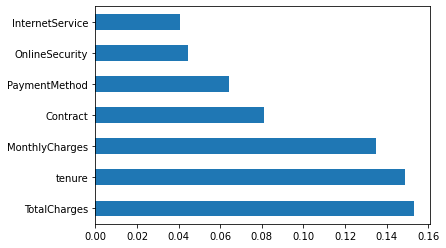

In [40]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)      #Making Pandas series
feat_importance.nlargest(7).plot(kind='barh')                                # Plotting the top 7 features with their scores
plt.show()

In [41]:
### Using Variance Threshold Method----This method accepts only independent Features and Thus used for Unsupervised Learning too
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)  #Basically it removes 0 Variance Features
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [42]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

* This Shows that almost all columns can be used and there is No Zero Variance Columns
* The threshold value may depend on dataset and Domain Expert Peoples

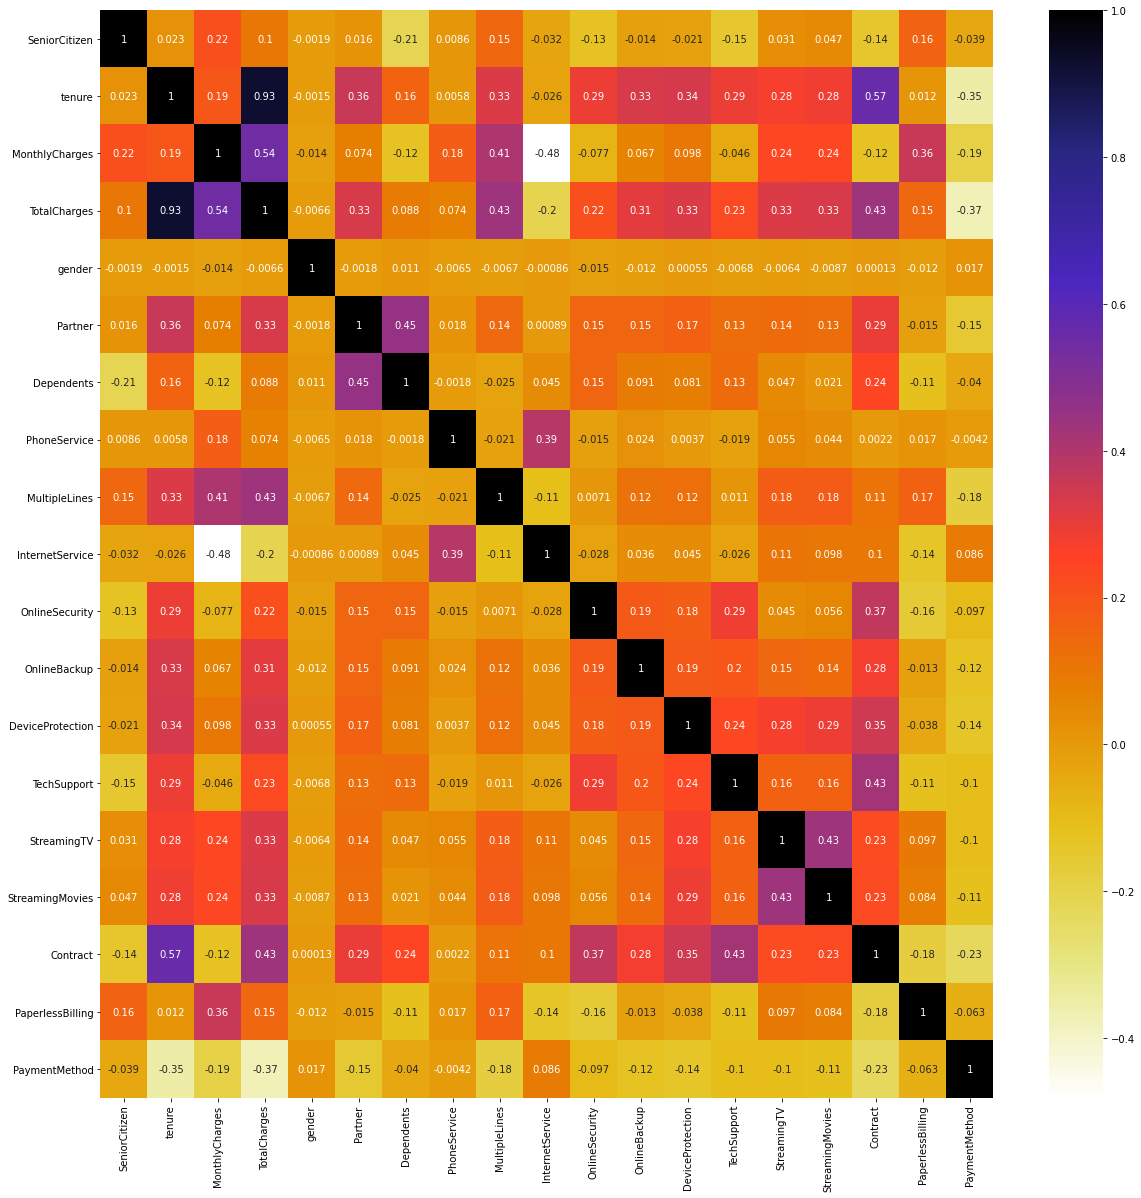

In [43]:
### Correlation Method
plt.figure(figsize=(20,20))
cor = x.corr()                                          # Correlation Table
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)      # annot = Displaying numbers 
plt.show()

In [44]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()                                    # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]        # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
correlated_features = correlation(x, 0.7) 
correlated_features

{'TotalCharges'}

* This is the Only column that got highly correlated

The Selected Columns from the above future selection analysis will be:
* Contract	
* OnlineSecurity	
* TechSupport	
* tenure	
* MonthlyCharges 
* SeniorCitizens
* Dependents

In [46]:
selected_features = ["Contract", "OnlineSecurity", "TechSupport", "tenure", "MonthlyCharges", "SeniorCitizen", "Dependents"]
x = x[selected_features]
x.head()

,Contract,OnlineSecurity,TechSupport,tenure,MonthlyCharges,SeniorCitizen,Dependents
0,0.0,0.0,0.0,0.000000,0.262711,0.0,0.0
1,0.5,1.0,0.0,0.824558,0.607633,0.0,0.0
2,0.0,1.0,0.0,0.162077,0.577747,0.0,0.0
3,0.5,1.0,1.0,0.890100,0.448845,0.0,0.0
4,0.0,0.0,0.0,0.162077,0.723110,0.0,0.0


In [48]:
from collections import Counter
counts = Counter(y)
counts

Counter({0: 5174, 1: 1869})

Now we need to select the Optimum Model as a regressor that Could Perform Well:

For that Following steps we need to follow:

* Importing the Different Models Using Sklearn Library
* Building Pipeline For each Model
* Iterate Through Each Model
* Finally calculate accuracy and take the Best Model

In [49]:
### Importing the different Models Library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.pipeline import Pipeline  ### For Building Pipelines

In [50]:
### Making the Pipelines for Models
pipeline_logistic_classifier = Pipeline([("Logistic Regression",LogisticRegression())])
pipeline_random_forest_classifier = Pipeline([("Random Forest Classifier",RandomForestClassifier(n_estimators=100))])
pipeline_decision_tree_classifier = Pipeline([("Decision Tree Classifier",DecisionTreeClassifier())])
pipeline_kneighbors_classifier = Pipeline([("KNeighbors Classifier",KNeighborsClassifier())])
pipeline_support_vector_classifier = Pipeline([("Support Vector Classifier",SVC(kernel="rbf", gamma=0.5, degree=2, C=1e3))])
pipeline_gradient_boosting_classifier = Pipeline([("GradientBoostingClassifier",GBC())])

In [51]:
### Lets split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [52]:
pipelines=[pipeline_logistic_classifier,pipeline_random_forest_classifier,pipeline_decision_tree_classifier, pipeline_kneighbors_classifier, pipeline_support_vector_classifier, pipeline_gradient_boosting_classifier]

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [53]:
### Making the dictionary for Models to find which has More efficiency
pipe_dict={0:"Logistic Regression",
           1:"Random Forest Classifier",
           2:"Decision Tree Classifier",
           3:"KNeighbors Classifier",
           4:"Support Vector Classifier",
           5:"Gradient Boosting Classifier"}

best_accuracy=0
best_classifier=""

In [54]:
### Calculate the Score for each Model
for i, model in enumerate(pipelines):
    print("{} has an score of {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression has an score of 0.7828246983676366
Random Forest Classifier has an score of 0.7735982966643009
Decision Tree Classifier has an score of 0.7139815471965933
KNeighbors Classifier has an score of 0.7700496806245565
Support Vector Classifier has an score of 0.7934705464868701
Gradient Boosting Classifier has an score of 0.7856635911994322


In [55]:
for i,model in enumerate(pipelines):
    if  model.score(x_test, y_test)>best_accuracy:
        best_accuracy = model.score(x_test, y_test)
        best_pipline = model
        best_classifier = i
print("best Model is {}".format(pipe_dict[best_classifier]))

best Model is Support Vector Classifier


* But we get Overfitting with Support Vector Model So lets use Random Forest Classifier

### 5.0 Model Building with Hyperparametre Tuning

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
### Making the support vector Classifier
Classifier = RandomForestClassifier()
Classifier.fit(x_train,y_train)             #Builting Model with Default Values

RandomForestClassifier()

In [58]:
### Generating the report 
"""
    Report Consists of 
    1. Confusion Matrix == Helps to identify the CLassification 
    2. Accuracy Score == Determines the accuracy of the Model
    3. Classification Report == Detailed Report on Classification
"""
def generate_report(cmatrix, report, score):
    
    #Generate the Confusion_matrix heatmap
    plt.figure(figsize=(5,5))
    
    sns.heatmap(cmatrix,
                annot=True,
                fmt="d",
                linewidths=5,
                square=True,
                cmap="Blues",
                annot_kws={"size":16},
                xticklabels=["No", "Yes"],
                yticklabels=["No", "Yes"])
    
    plt.xticks(rotation="horizontal", fontsize=16)
    plt.yticks(rotation="horizontal", fontsize=16)
    plt.xlabel("Predicted", size=20)
    plt.ylabel("Actual", size=20)
    title = "Accuracy Score: {0:.4f}".format(score)
    plt.title(title, size=20)
    
    # Display classification report and confusion_matrix
    print(report)
    plt.show()

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1084
           1       0.51      0.58      0.54       325

    accuracy                           0.77      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.78      0.77      0.78      1409



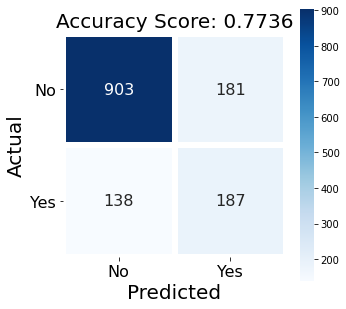

In [59]:
### Evaluating the accuracy and Other Parametres
predictions = Classifier.predict(x_test)                                   
cmatrix = confusion_matrix(predictions, y_test)
accuracy = accuracy_score(predictions, y_test)
report = classification_report(predictions, y_test)


generate_report(cmatrix, report, accuracy)

# Automated Hyperparameter Tuning

Automated Hyperparameter Tuning can be done by using techniques such as

* Bayesian Optimization
* Gradient Descent
* Evolutionary Algorithms

#### Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.


* Objective Function = defines the loss function to minimize.
* Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
* Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [60]:
### Importing the hyperopt Libraries
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [61]:
### Defining the Hyperparamtres via Domain Space
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
         }

In [62]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7fba0b1ef820>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fba0b1ef9d0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7fba0b1efaf0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7fba0b1efcd0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7fba0b1efdf0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7fba0b1efee0>}

In [63]:
### Defining Objective Funtion
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'],
                max_depth = space['max_depth'],
                max_features = space['max_features'],
                min_samples_leaf = space['min_samples_leaf'],
                min_samples_split = space['min_samples_split'],
                n_estimators = space['n_estimators'],
                )
    
    accuracy = cross_val_score(model, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [64]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [13:48<00:00, 10.36s/trial, best loss: -0.8006751762408569]


{'criterion': 1,
 'max_depth': 320.0,
 'max_features': 3,
 'min_samples_leaf': 0.003339877643907602,
 'min_samples_split': 0.00563536183797092,
 'n_estimators': 3}

In [65]:
### Fitting the Hyperparametre Model
classifier = RandomForestClassifier(criterion='gini', max_depth= 320.0, max_features= 'auto', min_samples_leaf= 0.003339877643907602, min_samples_split= 0.00563536183797092, n_estimators=750)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=320.0, min_samples_leaf=0.003339877643907602,
                       min_samples_split=0.00563536183797092, n_estimators=750)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1122
           1       0.50      0.64      0.56       287

    accuracy                           0.80      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.80      0.81      1409



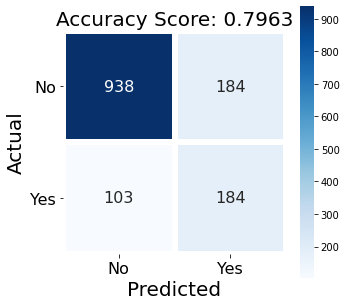

In [66]:
predictions = classifier.predict(x_test)
cmatrix = confusion_matrix(predictions, y_test)
report = classification_report(predictions, y_test)
score = accuracy_score(predictions, y_test)

generate_report(cmatrix, report, score)

* Getting Good results Lets Compare With Randomied Search CV

In [67]:
### Lets try with RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [68]:
classifier = RandomForestClassifier()
random_search=RandomizedSearchCV(classifier ,param_distributions=random_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [69]:
### Fit the Randomsearch Model
random_search.fit(x, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=3)

In [70]:
### Choosing the Best estimator
random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       min_samples_split=14, n_estimators=1000)

In [71]:
### Best params
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

In [72]:
classifier = RandomForestClassifier(n_estimators=1000, min_samples_split=14, min_samples_leaf=8, max_features='log2',max_depth=10,criterion='gini')
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       min_samples_split=14, n_estimators=1000)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1118
           1       0.51      0.64      0.57       291

    accuracy                           0.80      1409
   macro avg       0.70      0.74      0.72      1409
weighted avg       0.82      0.80      0.81      1409



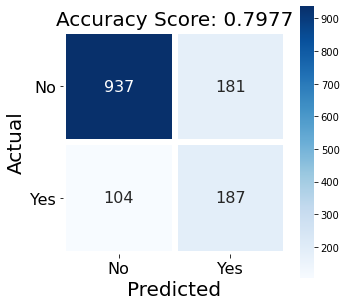

In [73]:
predictions = classifier.predict(x_test)
cmatrix = confusion_matrix(predictions, y_test)
report = classification_report(predictions, y_test)
score = accuracy_score(predictions, y_test)

generate_report(cmatrix, report, score)

* So Lets take Make the above model as a model as Classifier

In [74]:
classifier = RandomForestClassifier(n_estimators=1000, min_samples_split=14, min_samples_leaf=8, max_features='log2',max_depth=10,criterion='gini')

In [75]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       min_samples_split=14, n_estimators=1000)

In [76]:
### Lets try it with cross_validation Techniques
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)

In [77]:
score

array([0.80283688, 0.81276596, 0.79858156, 0.80681818, 0.78267045,
       0.76846591, 0.80823864, 0.78551136, 0.796875  , 0.81676136])

In [78]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)
skf.get_n_splits(x,y)

10

In [83]:
accuracy=[]

# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X1_train, X1_test = x.iloc[train_index], x.iloc[test_index] 
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction=classifier.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)

Train: [ 692  694  695 ... 7040 7041 7042] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

Train: [   0    1    2 ... 7040 7041 7042] Validation: [2105 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127 2128
 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142
 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156
 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170
 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183 2184
 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198
 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212
 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226
 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240
 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254
 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268
 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282
 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296
 2297 2298 2299 2300 2

Train: [   0    1    2 ... 7040 7041 7042] Validation: [4208 4209 4210 4215 4216 4217 4218 4219 4220 4221 4222 4223 4224 4225
 4227 4229 4231 4233 4234 4235 4236 4238 4239 4242 4243 4244 4245 4246
 4247 4248 4249 4250 4251 4252 4253 4256 4257 4260 4261 4263 4264 4267
 4268 4270 4271 4272 4273 4274 4275 4276 4277 4278 4279 4280 4281 4282
 4283 4284 4285 4286 4287 4288 4289 4290 4291 4292 4293 4294 4295 4296
 4297 4298 4299 4300 4301 4302 4303 4304 4305 4306 4307 4308 4309 4310
 4311 4312 4313 4314 4315 4316 4317 4318 4319 4320 4321 4322 4323 4324
 4325 4326 4327 4328 4329 4330 4331 4332 4333 4334 4335 4336 4337 4338
 4339 4340 4341 4342 4343 4344 4345 4346 4347 4348 4349 4350 4351 4352
 4353 4354 4355 4356 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366
 4367 4368 4369 4370 4371 4372 4373 4374 4375 4376 4377 4378 4379 4380
 4381 4382 4383 4384 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394
 4395 4396 4397 4398 4399 4400 4401 4402 4403 4404 4405 4406 4407 4408
 4409 4410 4411 4412 4

Train: [   0    1    2 ... 6357 6360 6365] Validation: [6330 6331 6332 6334 6335 6336 6337 6338 6340 6342 6343 6345 6347 6348
 6349 6350 6352 6353 6354 6355 6356 6358 6359 6361 6362 6363 6364 6366
 6367 6368 6369 6370 6371 6372 6373 6374 6375 6376 6377 6378 6379 6380
 6381 6382 6383 6384 6385 6386 6387 6388 6389 6390 6391 6392 6393 6394
 6395 6396 6397 6398 6399 6400 6401 6402 6403 6404 6405 6406 6407 6408
 6409 6410 6411 6412 6413 6414 6415 6416 6417 6418 6419 6420 6421 6422
 6423 6424 6425 6426 6427 6428 6429 6430 6431 6432 6433 6434 6435 6436
 6437 6438 6439 6440 6441 6442 6443 6444 6445 6446 6447 6448 6449 6450
 6451 6452 6453 6454 6455 6456 6457 6458 6459 6460 6461 6462 6463 6464
 6465 6466 6467 6468 6469 6470 6471 6472 6473 6474 6475 6476 6477 6478
 6479 6480 6481 6482 6483 6484 6485 6486 6487 6488 6489 6490 6491 6492
 6493 6494 6495 6496 6497 6498 6499 6500 6501 6502 6503 6504 6505 6506
 6507 6508 6509 6510 6511 6512 6513 6514 6515 6516 6517 6518 6519 6520
 6521 6522 6523 6524 6

* This split doesnt give that much accuracy

### 6.0 Model Deployment (Pickle File for Developing into an Web App)

In [79]:
import pickle

### Save the Model to Local disk
pickle.dump(classifier,open("model.pkl","wb"))

In [80]:
### Saving the Scaler
pickle.dump(scaler, open("scaler.pkl","wb"))